# **URBANIZATION IN KENYA**

### 1. a)Defining the Question

> We intend to draw insights of how urbanization is impacting different aspects of Kenyan Societies. 

### b) Defining the metric of success

> 1. Accurate determination of how urbanization affected different aspects of the kenyan society.
> 2. Determination of the key kenyan societal aspects affected most by Urbanization.
> 3. Accurate visualizations on urban trends overtime.
> 4. Accurate analysis on how urbanization has affected socio-economic indicators such as GDP per capita, education, and healthcare access.
> 5. Drawing up the upside and downside of urbanization and key areas that need focus.


### c) Understanding the context

> Urbanization in Kenya has surged in recent decades, driven by factors like rural-to-urban migration, population growth, and economic opportunities. Nairobi, the capital, stands as a focal point, drawing people seeking better prospects. This rapid growth presents challenges like housing shortages, traffic congestion, and strained services. However, it also fuels economic development, job creation, and innovation. The government is actively addressing these challenges through infrastructure improvements, affordable housing initiatives, and sustainable urban planning. To fully capitalize on this transformation, effective urban planning and infrastructure development are imperative.

> We intend to dig deeper through our data to try and understand urbanization and its effects better.

### d) Recording the experimental design

1. Data sourcing/loading
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preparation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Implementing the solution
10. Challenging the solution
11. Conclusion
12. Follow up questions

### e) Data relevance

> The data used has been found to be valid and of kenyan origin and the source accredited 

# 2. Data Understanding

In [170]:
# lets import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os
import pywedge as pw

# filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')


### a) reading the data

In [171]:
# lets read the dataset into a dataframe
df_1 = pd.read_csv('urbanization-external-data/Percentage_Distribution_of_Households_by_Age_and_Sex_of_Household_Head.csv')
df_2 = pd.read_csv('urbanization-external-data/Population_Distribution_by_Sex_in_Urban_Centres_and_Status_of_Centre__2019.csv')
df_3 = pd.read_csv('urbanization-external-data/Rural_Urban_Population_By_Age_Sex_and_by_District__2019.csv')


### b) Checking the data

Number of records in the datasets

In [172]:
# Number of rows and columns
# df_1 dataset
print(
    f'df_1 dataset: rows = {df_1.shape[0]} and columns = {df_1.shape[1]}')

# df_2 dataset
print(
    f'df_2 dataset: rows = {df_2.shape[0]} and columns = {df_2.shape[1]}')

# df_3 dataset
print(
    f'df_3 dataset: rows = {df_3.shape[0]} and columns = {df_3.shape[1]}')


df_1 dataset: rows = 94 and columns = 9
df_2 dataset: rows = 215 and columns = 16
df_3 dataset: rows = 25420 and columns = 9


> The datasets are big which makes analysis and drawing insights from them accurate

Top view of df_1

In [173]:
# let's preview the top data for the first dataframe
df_1.head(4)


,County,Gender,Age_Group_of_Household_head_15-24_%_,Age_Group_of_Household_head_25-34_%,Age_Group_of_Household_head_35-59_%,Age_Group_of_Household_head_60+_%,Number_of_households,County_Centroid,OBJECTID
0,Mombasa,Female,16.8%,36.8%,39.5%,6.8%,59858,"(-4.018795613, 39.653975520000003)",0
1,Kwale,Female,10.9%,25.4%,46.5%,17.1%,40265,"(-4.1398571640000004, 39.15036963)",1
2,Kilifi,Female,12.5%,26.6%,46.2%,14.7%,64963,"(-3.1731002359999998, 39.683055940000003)",2
3,Tana Rriver,Female,16.9%,25.6%,43.3%,14.2%,14447,"(-1.557428783, 39.412916930000002)",3


> The dataset has alot of numerical columns but needs some cleaning such as dropping the % and removing white spaces

Top view of df_2

In [174]:
# let's preview the top data for the 2nd dataframe
df_2.head(4)

,Urban_Center,District,Status,Core-Urban_Male_Population,Core-Urban_Female_Population,Total_Core-Urban_Population,Peri-Urban_Male_Population,Peri-Urban_Female_Population,Total_Peri-Urban_Population,Rural_Male_Population,Rural_Female_Population,Total_Rural_Population,Total_Male_Population,Total_Female_Population,Total_Population,OBJECTID
0,NAIROBI,Nairobi East/West/North/Westlands,City,1602104,1531414,3133518,NaN,NaN,NaN,NaN,NaN,NaN,1602104,1531414,3133518,0
1,MOMBASA,Mombasa/Kilindini,City,473433,441668,915101,12775.0,10255.0,23030.0,NaN,NaN,NaN,486208,451923,938131,1
2,KISUMU,Kisumu East/West/Nyando,City,131062,128196,259258,62816.0,66237.0,129053.0,10356.0,11261.0,21617.0,204234,205694,409928,2
3,NAKURU,Nakuru/Nakuru North,Municipality,145038,141373,286411,10843.0,10736.0,21579.0,NaN,NaN,NaN,155881,152109,307990,3


> The data looks good so we will proceed to exploration

Top view of df_3

In [175]:
# let's preview the top data for the third dataframe
df_3.head(4)

,District,Urban/Rural,Age_years,Male,Female,Total,County,Province,OBJECTID
0,NAIROBI WEST,Urban,0,10126,10116,20242,Nairobi,NAIROBI,0
1,NAIROBI WEST,Urban,1,8124,7989,16113,Nairobi,NAIROBI,1
2,NAIROBI WEST,Urban,2,8462,8627,17089,Nairobi,NAIROBI,2
3,NAIROBI WEST,Urban,3,8334,8420,16754,Nairobi,NAIROBI,3


> We may need to drop the objectID column to work with the dataset

Bottom view of df_1

In [176]:
# let's preview the bottom data for the third dataframe
df_1.tail(4)

,County,Gender,Age_Group_of_Household_head_15-24_%_,Age_Group_of_Household_head_25-34_%,Age_Group_of_Household_head_35-59_%,Age_Group_of_Household_head_60+_%,Number_of_households,County_Centroid,OBJECTID
90,Kakamega,Male,8.6%,28.3%,47.6%,15.5%,232861,"(0.40615735600000002, 34.745339440000002)",90
91,Vihiga,Male,4.7%,18.7%,49.1%,27.5%,73570,"(0.078465934000000001, 34.722131930000003)",91
92,Bungoma,Male,8.4%,30.8%,47.7%,13.1%,187564,"(0.75075376699999996, 34.639862209999997)",92
93,Busia,Male,9.4%,29.5%,44.9%,16.2%,95861,"(0.385079797, 34.191127909999999)",93


Bottom view of df_2

In [177]:
# let's preview the bottom data for the third dataframe
df_2.tail(4)

,Urban_Center,District,Status,Core-Urban_Male_Population,Core-Urban_Female_Population,Total_Core-Urban_Population,Peri-Urban_Male_Population,Peri-Urban_Female_Population,Total_Peri-Urban_Population,Rural_Male_Population,Rural_Female_Population,Total_Rural_Population,Total_Male_Population,Total_Female_Population,Total_Population,OBJECTID
211,PORT VICTORIA,Bunyala,Town Council,3101,3460,6561,NaN,NaN,NaN,7337.0,7803.0,15140.0,10438,11263,21701,211
212,OTHAYA,Nyeri South,Town Council,2385,2752,5137,NaN,NaN,NaN,6589.0,7217.0,13806.0,8974,9969,18943,212
213,KAJIADO,Kajiado Central,Town Council,7458,7173,14631,107.0,122.0,229.0,1718.0,1703.0,3421.0,9283,8998,18281,213
214,WOTE,Makueni,Town Council,4887,4988,9875,NaN,NaN,NaN,NaN,NaN,NaN,4887,4988,9875,214


> We have some missing values that we may need to find out whether important then we drop or keep them

Bottom view of df_3

In [178]:
# let's preview the bottom data for the third dataframe
df_3.tail(4)


,District,Urban/Rural,Age_years,Male,Female,Total,County,Province,OBJECTID
25416,TESO SOUTH,Rural,78,63,47,110,Busia,WESTERN,25416
25417,TESO SOUTH,Rural,79,90,121,211,Busia,WESTERN,25417
25418,TESO SOUTH,Rural,80+,384,391,775,Busia,WESTERN,25418
25419,TESO SOUTH,Rural,Age NS,25,23,48,Busia,WESTERN,25419


### c) Checking the Datatypes

In [179]:
# lets get the datasets' information
# df_1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   County                                94 non-null     object
 1   Gender                                94 non-null     object
 2   Age_Group_of_Household_head_15-24_%_  94 non-null     object
 3   Age_Group_of_Household_head_25-34_%   94 non-null     object
 4   Age_Group_of_Household_head_35-59_%   94 non-null     object
 5   Age_Group_of_Household_head_60+_%     94 non-null     object
 6   Number_of_households                  94 non-null     int64 
 7   County_Centroid                       94 non-null     object
 8   OBJECTID                              94 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 6.7+ KB


> There appears to be no missing values but we may have to rename some column names and then remove the % from the contents and white spaces and also convert the data types to int. We will check the significance of county_centroid and OBJECTID to see whether to drop it or not to.

In [180]:
# df_2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Urban_Center                  215 non-null    object 
 1   District                      215 non-null    object 
 2   Status                        215 non-null    object 
 3   Core-Urban_Male_Population    215 non-null    int64  
 4   Core-Urban_Female_Population  215 non-null    int64  
 5   Total_Core-Urban_Population   215 non-null    int64  
 6   Peri-Urban_Male_Population    114 non-null    float64
 7   Peri-Urban_Female_Population  114 non-null    float64
 8   Total_Peri-Urban_Population   114 non-null    float64
 9   Rural_Male_Population         93 non-null     float64
 10  Rural_Female_Population       93 non-null     float64
 11  Total_Rural_Population        93 non-null     float64
 12  Total_Male_Population         215 non-null    int64  
 13  Total

> We have some missing values which we will fill appropriately after deeper analysis, the data types of some columns will also be changed, we will also drop OBJECTID

In [181]:
# df_3
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   District     25420 non-null  object
 1   Urban/Rural  25420 non-null  object
 2   Age_years    25420 non-null  object
 3   Male         25420 non-null  int64 
 4   Female       25420 non-null  int64 
 5   Total        25420 non-null  int64 
 6   County       25420 non-null  object
 7   Province     25420 non-null  object
 8   OBJECTID     25420 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


> There are no missing values, we will change the data type of the age column to int and drop the OBJECTID

# 3. External Data Validation

> The datasets have been derived from driven data therefore proven to be valid for this study as they fall within the scope.

# 4. Data Preparation

### a) Consistency

Here we check for duplicates in our datasets before dropping any column

In [182]:
# lets check for duplicates
# df_1
print(df_1.duplicated().any())

# df_2
print(df_2.duplicated().any())

# df_3
print(df_3.duplicated().any())

False
False
False


> Duplicates are absent in all the datasets

### b) Validation

The county_centroid and OBJECTID columns will be dropped as they are not showing any relevance

In [183]:
# Checking relevance of the county_centroid and objectid columns
print(f"""

for df_1(Distribution by household head) \n
Percentage of unique values (df_1): {(len(df_1.County_Centroid.unique()) / df_1.shape[0]) * 100}%
Percentage of unique values (df_1): {(len(df_1.OBJECTID.unique()) / df_1.shape[0]) * 100}%

for df_2(Distribution by sex and state of centre) \n
Percentage of unique values (df_2): {(len(df_2.OBJECTID.unique()) / df_2.shape[0]) * 100}%

for df_3(Distribution by District) \n
Percentage of unique values (df_3): {(len(df_3.OBJECTID.unique()) / df_3.shape[0]) * 100}%
""")



for df_1(Distribution by household head) 

Percentage of unique values (df_1): 50.0%
Percentage of unique values (df_1): 100.0%

for df_2(Distribution by sex and state of centre) 

Percentage of unique values (df_2): 100.0%

for df_3(Distribution by District) 

Percentage of unique values (df_3): 100.0%



> As the county_centroid and OBJECTIDs numbers have a high number of unique values, they will be dropped from all the datasets.



In [184]:
# Removing columns that do not add meaning to the project
df_1.drop(['County_Centroid', 'OBJECTID'], axis=1, inplace=True)
df_2.drop(['OBJECTID'], axis=1, inplace=True)
df_3.drop(['OBJECTID'], axis=1, inplace=True)


In [185]:
# Ensuring changes have been made

print(f"""
for df_1(Distribution by household head) \n
df_1 columns: {len(df_1.columns.values)}

for df_2(Distribution by sex and state of centre) \n
df_2 columns: {len(df_2.columns.values)}

for df_3(Distribution by District) \n
df_3 columns: {len(df_3.columns.values)}
""")


for df_1(Distribution by household head) 

df_1 columns: 7

for df_2(Distribution by sex and state of centre) 

df_2 columns: 15

for df_3(Distribution by District) 

df_3 columns: 8



Correcting the names of columns

In [186]:
# lets rename the columns properly: df_1
df_1.columns = df_1.columns.str.replace('%_', '%')
df_1.columns

Index(['County', 'Gender', 'Age_Group_of_Household_head_15-24_%',
       'Age_Group_of_Household_head_25-34_%',
       'Age_Group_of_Household_head_35-59_%',
       'Age_Group_of_Household_head_60+_%', 'Number_of_households'],
      dtype='object')

In [187]:
# lets rename the columns properly: df_2
df_2.columns = df_2.columns.str.replace('-', '_')
df_2.columns

Index(['Urban_Center', 'District', 'Status', 'Core_Urban_Male_Population',
       'Core_Urban_Female_Population', 'Total_Core_Urban_Population',
       'Peri_Urban_Male_Population', 'Peri_Urban_Female_Population',
       'Total_Peri_Urban_Population', 'Rural_Male_Population',
       'Rural_Female_Population', 'Total_Rural_Population',
       'Total_Male_Population', 'Total_Female_Population', 'Total_Population'],
      dtype='object')

> The columns are properly named.

Removing % and _ from the contents of the column and changing the data types to int

In [188]:
# this is a function that removes % and or _ from column rows
def strip_special_characters(df, column_name):
    # Remove underscores and percentage signs
    df[column_name] = df[column_name].str.replace('_', '')
    df[column_name] = df[column_name].str.replace('%', '')

    # Convert the column to numeric (if it contains numeric values)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

In [189]:
# passing the function for df_1
strip_special_characters(df_1, 'Age_Group_of_Household_head_15-24_%')
strip_special_characters(df_1, 'Age_Group_of_Household_head_25-34_%')
strip_special_characters(df_1, 'Age_Group_of_Household_head_35-59_%')
strip_special_characters(df_1, 'Age_Group_of_Household_head_60+_%')

df_1.dtypes

County                                  object
Gender                                  object
Age_Group_of_Household_head_15-24_%    float64
Age_Group_of_Household_head_25-34_%    float64
Age_Group_of_Household_head_35-59_%    float64
Age_Group_of_Household_head_60+_%      float64
Number_of_households                     int64
dtype: object

### c) Completeness

Percentage of missing values in the datasets

In [190]:
# Function to find the percentage of missing values
def PercentageMissing(data):
   # percentage of missing values
   for col in data.columns.tolist():
      missing = data[col].isnull().sum()
      if missing > 0:
         print(f'{col} = {round((missing/data.shape[0])*100)}%')

In [191]:
# checking for missing values
# df_1
PercentageMissing(df_1)

> We have no output thus the data df_1 has no missing values

In [192]:
# df_2
PercentageMissing(df_2)

Peri_Urban_Male_Population = 47%
Peri_Urban_Female_Population = 47%
Total_Peri_Urban_Population = 47%
Rural_Male_Population = 57%
Rural_Female_Population = 57%
Total_Rural_Population = 57%


> The dataset has quite a number of missing values, we will however not impute them because they are less than 75% of the total data, and we can also consider the dataset a crucial dataset in this scenario.

In [193]:
# df_3
PercentageMissing(df_3)

> The third dataset has no missing values

Filling the missing values

In [194]:
# Function used to fill in missing values using the column mean or highest column
# frequency.
def Fillna(class_values,  ref_col, target_col, fill_value, data):
   means = []
   freqs = []
   if fill_value == 'mean':
    for val in class_values:
      means.append(int(data[data[ref_col] == val][target_col].mean()))
    for val, fill in zip(class_values, means):
      data.loc[(data[ref_col] == val) & (
          data[target_col].isnull() == True), target_col] = fill

   elif fill_value == 'freq':
    for val in class_values:
      freqs.append(data[data[ref_col] == val]
                   [target_col].value_counts().index[0])
    for val, fill in zip(class_values, freqs):
      data.loc[(data[ref_col] == val) & (
          data[target_col].isnull() == True), target_col] = fill

In [195]:
# function to fill missing values with the mean
def fill_missing_with_mean(df, column_name):
    # Calculate the mean of the column
    mean_value = df[column_name].mean()

    # Fill missing values with the mean
    df[column_name].fillna(mean_value, inplace=True)

    return df.isnull().sum()

In [196]:
# lets write a for loop to fill the missing values using the function above 
for column in df_2.columns[df_2.isnull().any()]:
    df = fill_missing_with_mean(df_2, column)

In [197]:
# confirming that changes have been made
df_2.isnull().any()

Urban_Center                    False
District                        False
Status                          False
Core_Urban_Male_Population      False
Core_Urban_Female_Population    False
Total_Core_Urban_Population     False
Peri_Urban_Male_Population      False
Peri_Urban_Female_Population    False
Total_Peri_Urban_Population     False
Rural_Male_Population           False
Rural_Female_Population         False
Total_Rural_Population          False
Total_Male_Population           False
Total_Female_Population         False
Total_Population                False
dtype: bool

> We filled the missing data with the mean of the associated columns assuming the regions must have had low counts.

> All missing values have been dealt with

We can now convert data types to int from float for df_2

In [198]:
# for df_2 we will convert the float to int

# there cannot be a decimal of a human being
df_2['Peri_Urban_Male_Population'] = df_2['Peri_Urban_Male_Population'].astype(
    int)
df_2['Peri_Urban_Female_Population'] = df_2['Peri_Urban_Female_Population'].astype(
    int)
df_2['Total_Peri_Urban_Population'] = df_2['Total_Peri_Urban_Population'].astype(
    int)
df_2['Rural_Male_Population'] = df_2['Rural_Male_Population'].astype(int)
df_2['Rural_Female_Population'] = df_2['Rural_Female_Population'].astype(int)
df_2['Total_Rural_Population'] = df_2['Total_Rural_Population'].astype(int)

# lets check the dtypes
df_2.dtypes


Urban_Center                    object
District                        object
Status                          object
Core_Urban_Male_Population       int64
Core_Urban_Female_Population     int64
Total_Core_Urban_Population      int64
Peri_Urban_Male_Population       int64
Peri_Urban_Female_Population     int64
Total_Peri_Urban_Population      int64
Rural_Male_Population            int64
Rural_Female_Population          int64
Total_Rural_Population           int64
Total_Male_Population            int64
Total_Female_Population          int64
Total_Population                 int64
dtype: object

> The data types are all in int which is ready for further analysis

### d) Uniformity

In [199]:
# for df_1
print(df_1.columns)

# for df_2
print(df_2.columns)

# for df_3
print(df_3.columns)

Index(['County', 'Gender', 'Age_Group_of_Household_head_15-24_%',
       'Age_Group_of_Household_head_25-34_%',
       'Age_Group_of_Household_head_35-59_%',
       'Age_Group_of_Household_head_60+_%', 'Number_of_households'],
      dtype='object')
Index(['Urban_Center', 'District', 'Status', 'Core_Urban_Male_Population',
       'Core_Urban_Female_Population', 'Total_Core_Urban_Population',
       'Peri_Urban_Male_Population', 'Peri_Urban_Female_Population',
       'Total_Peri_Urban_Population', 'Rural_Male_Population',
       'Rural_Female_Population', 'Total_Rural_Population',
       'Total_Male_Population', 'Total_Female_Population', 'Total_Population'],
      dtype='object')
Index(['District', 'Urban/Rural', 'Age_years', 'Male', 'Female', 'Total',
       'County', 'Province'],
      dtype='object')


> We will convert the column names to lower case for ease of reference during further analysis.

In [200]:
# for df_1
df_1.columns = df_1.columns.str.lower()

# for df_2
df_2.columns = df_2.columns.str.lower()

# for df_3
df_3.columns = df_3.columns.str.lower()

In [201]:
# checking to confirm
# for df_1
print(df_1.columns)

# for df_2
print(df_2.columns)

# for df_3
print(df_3.columns)


Index(['county', 'gender', 'age_group_of_household_head_15-24_%',
       'age_group_of_household_head_25-34_%',
       'age_group_of_household_head_35-59_%',
       'age_group_of_household_head_60+_%', 'number_of_households'],
      dtype='object')
Index(['urban_center', 'district', 'status', 'core_urban_male_population',
       'core_urban_female_population', 'total_core_urban_population',
       'peri_urban_male_population', 'peri_urban_female_population',
       'total_peri_urban_population', 'rural_male_population',
       'rural_female_population', 'total_rural_population',
       'total_male_population', 'total_female_population', 'total_population'],
      dtype='object')
Index(['district', 'urban/rural', 'age_years', 'male', 'female', 'total',
       'county', 'province'],
      dtype='object')


### e) Outliers

In [202]:
# function to get outliers using iqr
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [203]:
# lets see the percentage of outliers per dataset
outliers(df_1)
outliers(df_2)
outliers(df_3)

Number of outliers = 17
Percentage = 18.085106382978726%
Number of outliers = 107
Percentage = 49.76744186046512%
Number of outliers = 2591
Percentage = 10.192761605035406%


> The outliers are quite minimal for the first and the third dataset, the second one however has a high number of outliers but we will retain them reason being, dropping 49% of a dataset makes it biased.

# 5. Descriptive Analysis

### a) univariate Analysis

Categorical for df_1

In [204]:
#  Categorical Plots function
def CatPlots(column, rot, data):
  fig,ax  = plt.subplots(figsize = (20,5))
  sns.countplot(data[column], palette = 'mako', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xticks(rotation = rot)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01))
  plt.show()

In [205]:
# lets see the number of unique values per column for df_1
for col in df_1.columns.tolist():
  print(f'{col}: {len(df_1[col].unique())}')

county: 47
gender: 2
age_group_of_household_head_15-24_%: 59
age_group_of_household_head_25-34_%: 76
age_group_of_household_head_35-59_%: 67
age_group_of_household_head_60+_%: 76
number_of_households: 94


In [212]:
# Categorical columns for df_1
categorical = df_1.select_dtypes(include='object').columns.tolist()
categorical

['county', 'gender']

> Categorical columns in df_1 are 2: county and gender

Numerical for df_1

In [225]:
# Distribution and Boxplot plot functions
def NumericalPlots(column, data):
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  # Outliers
  # Distribution plot
  sns.distplot(data[column], hist=True, ax=ax[0], color='brown')
  ax[0].set_title('Outliers: Freq dist ' + column, fontsize=10)
  ax[0].set_xlabel(column, fontsize=8)
  ax[0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y=data[column], ax=ax[1], color='teal')
  ax[1].set_title(f'Outliers: Box Plot - {column}')
  ax[1].set_xlabel(column)


In [218]:
# Continuos columns
continuous = df_1.select_dtypes(exclude='object').columns.tolist()
continuous

['age_group_of_household_head_15-24_%',
 'age_group_of_household_head_25-34_%',
 'age_group_of_household_head_35-59_%',
 'age_group_of_household_head_60+_%',
 'number_of_households']

> The columns above are numerical columns in df_1

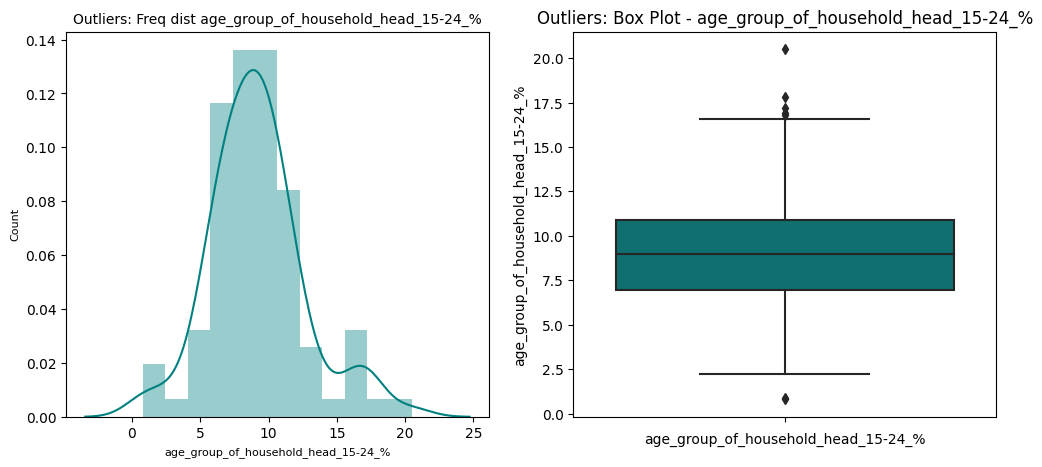

In [220]:
# age_group_of_household_head_15-24_%
NumericalPlots('age_group_of_household_head_15-24_%', df_1)

> Most of the household heads are above the ages of 10, the distribution is slightly positively skewed.

> The outliers are formed by household heads above 17 years

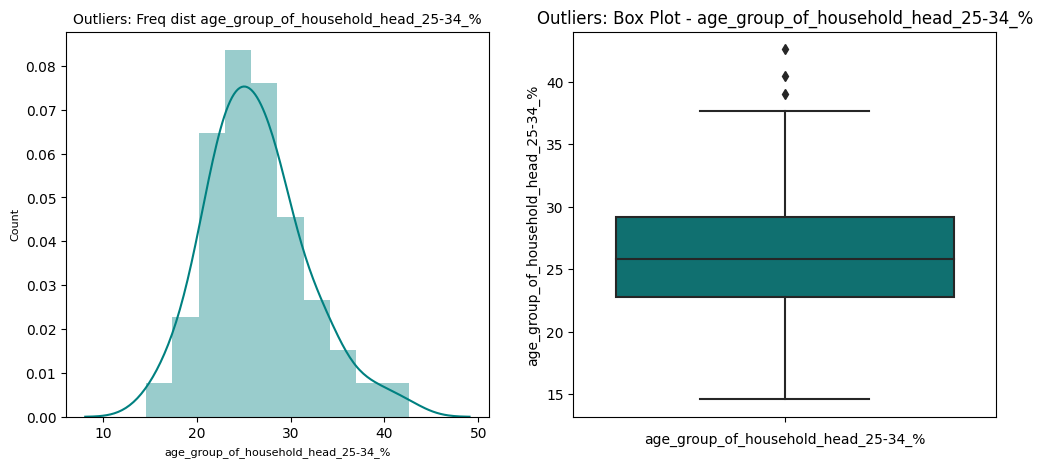

In [222]:
# for age_group_of_household_head_25-34_%
NumericalPlots('age_group_of_household_head_25-34_%', df_1)

> Most household heads are in this age bracket hence the bell shaped curve, the mean, the median and the mode are equal at this point.

> Outliers on the top are mainly older household heads

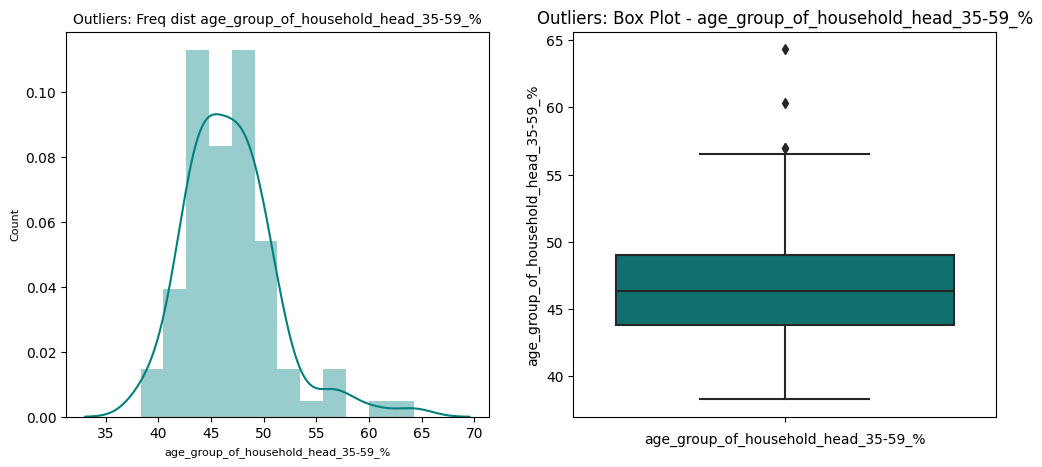

In [223]:
# for age_group_of_household_head_35-59_%
NumericalPlots('age_group_of_household_head_35-59_%', df_1)

> House hold heads in this bracket are below 50 years, therefore the distribution is positively skewed 

> Outliers are formed by the few older household heads

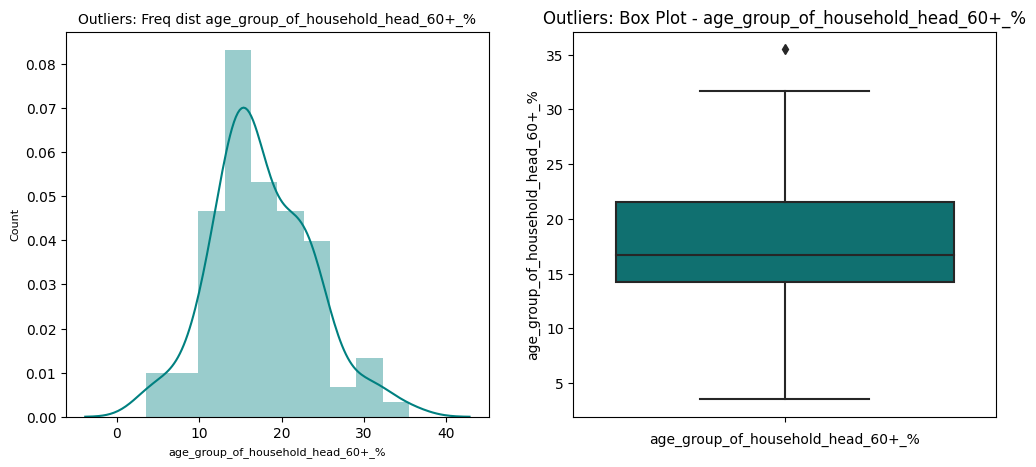

In [224]:
# for age_group_of_household_head_60+_%
NumericalPlots('age_group_of_household_head_60+_%', df_1)

> This bracket also has positive skewness ass household heads are fewer as the ages go by

Categorical for df_2

In [226]:
# lets see the number of unique values per column for df_2
for col in df_2.columns.tolist():
  print(f'{col}: {len(df_2[col].unique())}')


urban_center: 215
district: 140
status: 4
core_urban_male_population: 211
core_urban_female_population: 213
total_core_urban_population: 214
peri_urban_male_population: 115
peri_urban_female_population: 115
total_peri_urban_population: 115
rural_male_population: 94
rural_female_population: 94
total_rural_population: 93
total_male_population: 214
total_female_population: 213
total_population: 214


In [228]:
# Categorical columns for df_2
categorical = df_2.select_dtypes(include='object').columns.tolist()
categorical


['urban_center', 'district', 'status']

> df_2 has 3 numerical columns

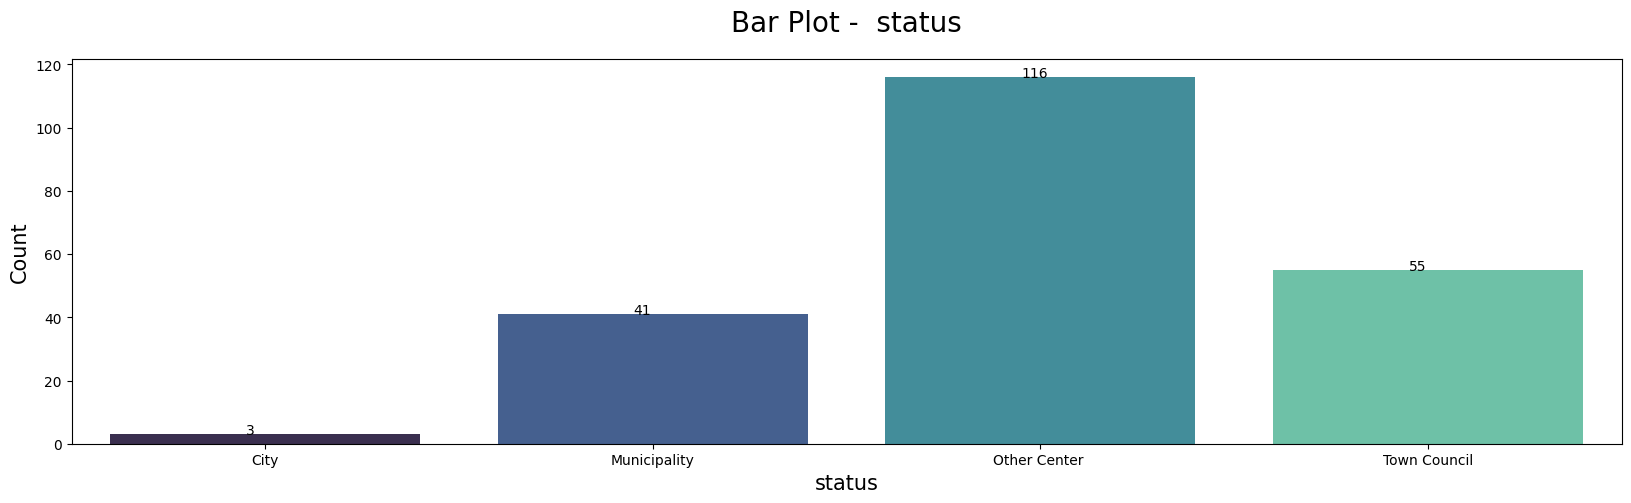

In [231]:
# catplots for urban center
CatPlots('status', 0, df_2)


> The data shows that most of the population don't live in cities, they prefer other centers followed by town councils then we have municipalities in order of preference

Numerical for df_2

In [233]:
# continuous variables for df_2
continuous = df_2.select_dtypes(exclude='object').columns.tolist()
continuous


['core_urban_male_population',
 'core_urban_female_population',
 'total_core_urban_population',
 'peri_urban_male_population',
 'peri_urban_female_population',
 'total_peri_urban_population',
 'rural_male_population',
 'rural_female_population',
 'total_rural_population',
 'total_male_population',
 'total_female_population',
 'total_population']

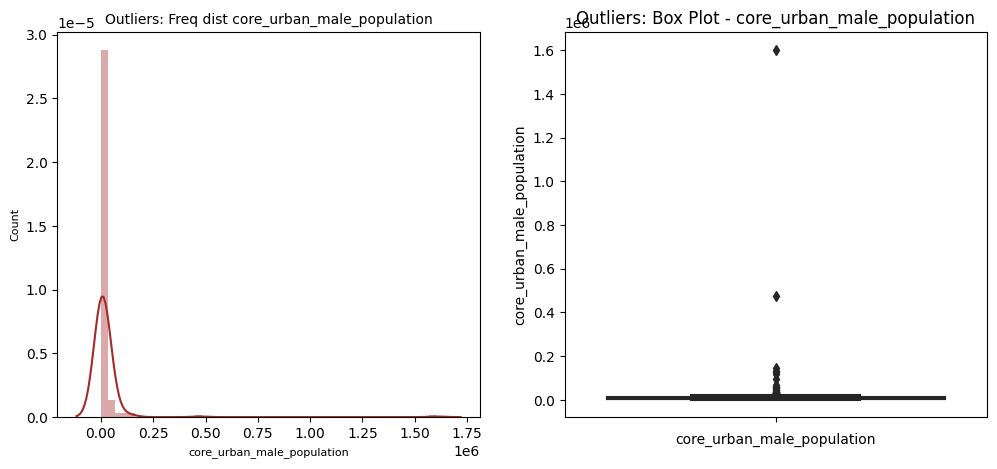

In [234]:
# for core_urban_male_population
NumericalPlots('core_urban_male_population', df_2)


> The data shows that the male population do not prefer living in the core urban areas therefore the data is positively skewed.

> Outliers are caused by male who live in peri urban areas

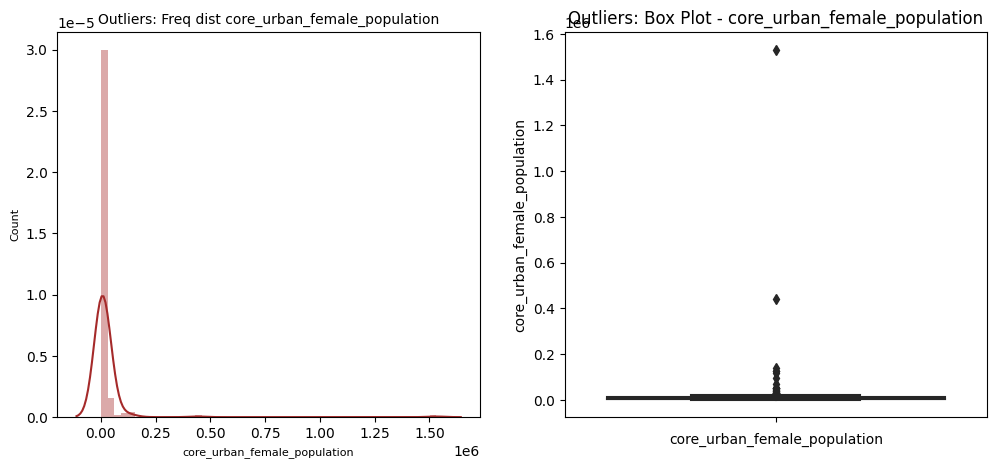

In [235]:
# for core_urban_female_population
NumericalPlots('core_urban_female_population', df_2)


> The skew is positive

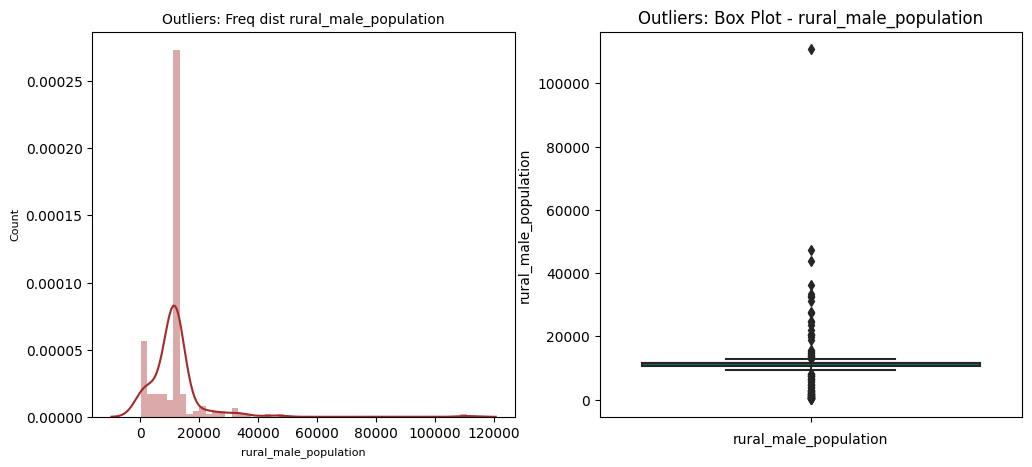

In [236]:
# for rural_male_population
NumericalPlots('rural_male_population', df_2)


> More male prefer living in rural areas

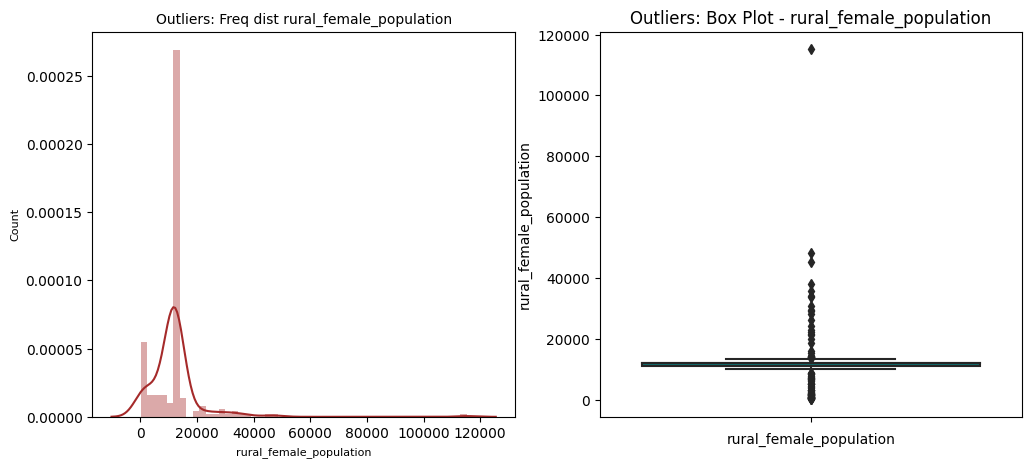

In [237]:
# for rural_female_population
NumericalPlots('rural_female_population', df_2)


> The data for the rural areas for both male and female is positively skewed meaning more people prefer living in rural areas.

Categorical for df_3

In [238]:
# lets see the number of unique values per column for df_3
for col in df_3.columns.tolist():
  print(f'{col}: {len(df_3[col].unique())}')


district: 158
urban/rural: 2
age_years: 82
male: 3798
female: 3819
total: 5696
county: 47
province: 8


In [239]:
# Categorical columns
categorical = df_3.select_dtypes(include='object').columns.tolist()
categorical

['district', 'urban/rural', 'age_years', 'county', 'province']

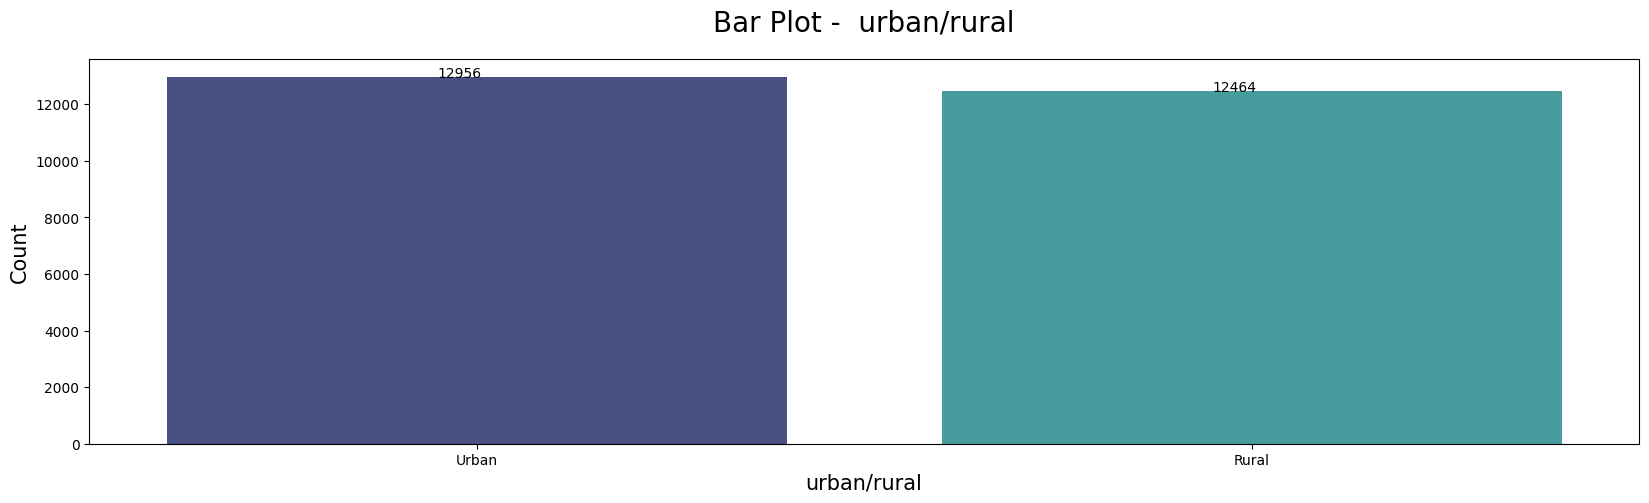

In [244]:
CatPlots('urban/rural',0,df_3)

> It shows that more people prefer living in urban areas

Numerical for df_3

In [245]:
# for continuos columns
continuous = df_3.select_dtypes(exclude='object').columns.tolist()
continuous


['male', 'female', 'total']

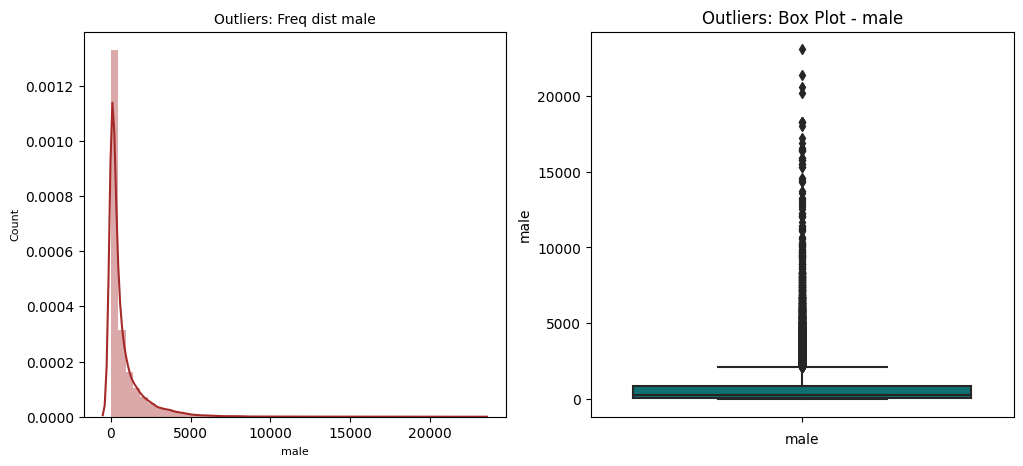

In [247]:
# for the male column
NumericalPlots('male', df_3)

> The skew is positive suggesting more males prefer living in urban areas

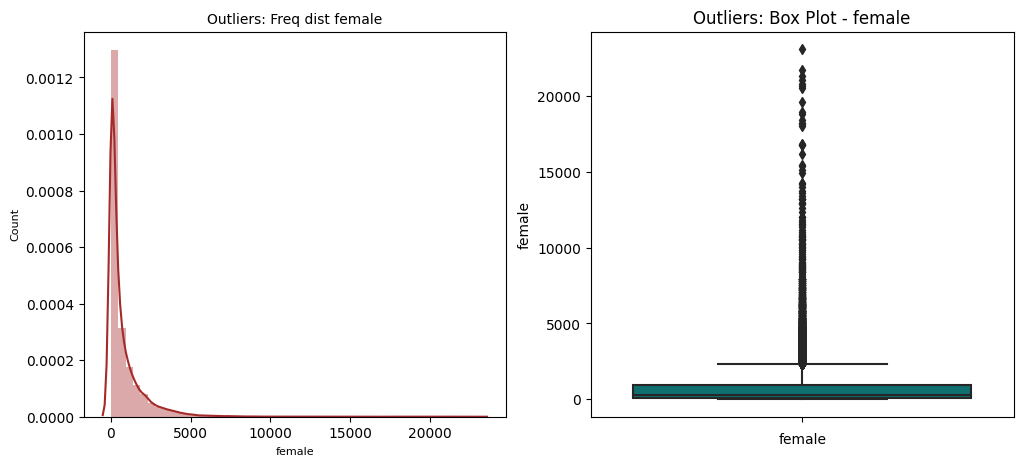

In [248]:
# for female column
NumericalPlots('female', df_3)


> > The skew is positive suggesting more females prefer living in urban areas

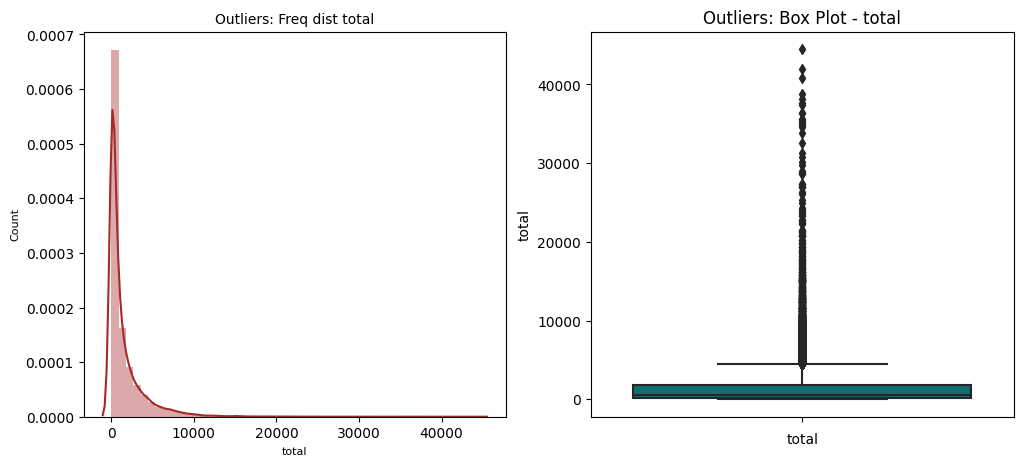

In [249]:
# for total column
NumericalPlots('total', df_3)


> The bulk of the population lives in urban centres, the data is positively skewed.

### B) Bivariate Analysis

Categorical - Categorical for df3

## Instantiating the Pywedge_Charts Class

For inputs, pywedge takes:

1. Dataframe
2. c = any redundant column to be removed
3. y = target column as a string

In [40]:
mc = pw.Pywedge_Charts(df_2, c=None, y='urban_center')


In [41]:
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

### b) Checking the data

Number of Records

In [13]:
# lets print the number of rows and columns for train and test sets
print(f'The train data has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The test data has {test.shape[0]} rows and {test.shape[1]} columns')

The train data has 891 rows and 12 columns
The test data has 418 rows and 11 columns


> The train data has more columns than the test data by one namely the "Survived" column.

Top dataset view

In [14]:
# lets view the top of the datasets
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# preview of the test column
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> The test data does not have the label column

In [16]:
# lets see the bottom records
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
# for the test
test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Checking the data types

In [18]:
# let's see the data types of the columns for train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> The data types are okay only that the age, embarked and cabin have too many missing values.

In [19]:
# for test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


> Age, fare, cabin seem to have missing values, otherwise everything is okay.

# 3. External dataset validation

The dataset is similar to a Kaggle Titanic dataset. It has also been used by the Computer Science Department in Stanford University as part of course work. Stanford is a well known ivy league university, therefore, the dataset is valid.



# 4. Data Preparation

### a) Consistency

In [29]:
# test
test.duplicated().any()

False

In [30]:
# train
train.duplicated().any()

False

> We dont have duplicates in the dataset

### b) Validation

> We are dropping the passenger id column because we can use passenger names for identification

> We also check the relevance of the ticket column

In [34]:
# lets check the relevance of the ticket column
print(f'The percentage of unique values in the train dataset is {round((len(train.Ticket.unique()) / train.shape[0]) * 100)} %')

print(f'The percentage of unique values in the test dataset is {round((len(test.Ticket.unique()) / test.shape[0]) * 100)} %')

The percentage of unique values in the train dataset is 76 %
The percentage of unique values in the test dataset is 87 %


> The tickets have high numbers of unique values which can be used to identify the individual survivors

In [35]:
# lets drop the passenger id column
train.drop(['PassengerId'], axis = 1, inplace= True)
test.drop(['PassengerId'], axis = 1, inplace = True)


In [36]:
# lets check to see if changes have been made
print(f'The train has {len(train.columns.values)}')
print(f'The test has {len(test.columns.values)}')

The train has 11
The test has 10


### c) Completeness

> We are checking for the percentage of missing values

In [39]:
# let's create a function to find the percentage of missing values
def PercentageMissing(data):
   for col in data.columns.to_list():
      missing = data[col].isnull().sum()
      if missing > 0:
         print(f'{col} = {(missing/data.shape[0]) * 100 }%')

In [40]:
# checking for missing values in the train
PercentageMissing(train)

Age = 19.865319865319865%
Cabin = 77.10437710437711%
Embarked = 0.22446689113355783%


In [41]:
# for test
PercentageMissing(test)

Age = 20.574162679425836%
Fare = 0.23923444976076555%
Cabin = 78.22966507177034%


> We are dropping the cabin column because it has more than 75 percent missing in both dataframes.

In [42]:
# dropping cabin
train.drop(['Cabin'], axis = 1, inplace= True)
test.drop(['Cabin'], axis= 1, inplace= True)

In [43]:
# lets see the unique passenger class values
train.Pclass.unique()

array([3, 1, 2])

In [ ]:
# lets create a function to fill in the missing values with the column mean or the highest column frequency

